<h1>Taller ODE Con Métodos Numéricos</h1>
<h2>Juan Pablo Peñaloza, Nicolás Miranda, William Moreno y Johan Murillo</h2>

<h3>1.</h3>

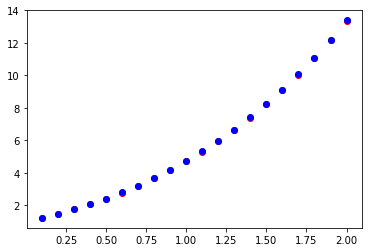

In [1]:
from pylab import *
from mpmath import odefun, cos, sin, mpf, sinc, mp


def f(x,y):
    return y + x - x**2 +1


def realSol(x):
    g = odefun(lambda x, y: y + x - x**2 +1, 0, 1)
    return g(x)
    
def euler(f, x, y, h, m):
    u = []
    v = []
    for i in range(m):
        k1 = h * f(x,y)
        k2 = h * f(x+ h, y + k1)
        y = y + (0.5)*(k1 + k2)
        x = x + h
        u = u + [x]
        v = v + [y]
    return [u,v]

[u,v] = euler(f,0,1,0.1,20)
realV = [];
for i in u:
    realV.append(realSol(i))

plot(u,v,'or')
plot(u,realV,'ob')
show()

<h3>2.</h3>

In [ ]:
def f(x,y):
    return 2*y - 2*x**2 + x - 3

def euler(f, x, y, h, m):
    u = []
    v = []
    for i in range(m):
        k1 = h * f(x,y)
        k2 = h * f(x+ h, y + k1)
        y = y + (0.5)*(k1 + k2)
        x = x + h
        u = u + [x]
        v = v + [y]
    return [u,v]

